In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle

from pathlib import Path
from matplotlib import pyplot as plt

In [13]:
with open('binary_classification_results.pkl', 'rb') as f:
    results = pickle.load(f)

['Kernel', 'Linear', 'LMNN']
['distances', 'time', 'ASW_scores', 'K-NN mean accuracies', 'K-NN std accuracies', 'K-NN error rates']
(3, 20)
(20,)
(3, 20)
(20,)
(3, 20)
(20,)


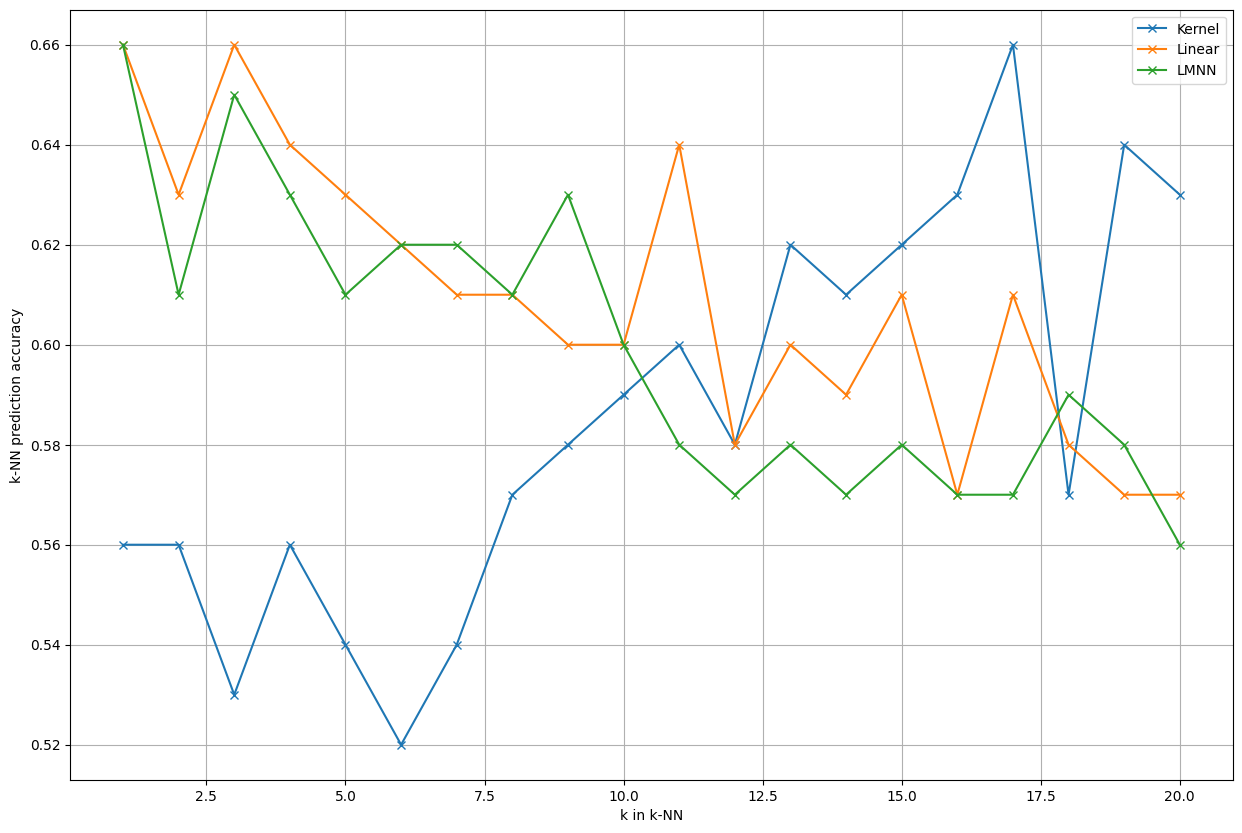

In [16]:
datasets = list(results.keys())
methods = list(results[datasets[0]].keys())
print(methods)
method_arguments = list(results[datasets[0]][methods[0]])
print(method_arguments)


total_medians = []
for method in methods:
    
    kNN_accuracies = []
    for dataset in datasets:
        kNN_accuracies.append(results[dataset][method]['K-NN mean accuracies'])
        #kNN_accuracies.append(results[dataset][method]['K-NN error rates'])
        #accs = results[dataset][method]['K-NN error rates']
        #accs = [array[1::2] for array in accs]
        #kNN_accuracies.append(accs)

    
    medians = np.median(kNN_accuracies, axis=0)
    total_medians.append(medians)

plt.figure(figsize=(15, 10))

for idx, (method, medians) in enumerate(zip(methods, total_medians)):
    plt.plot(range(1, len(medians) + 1), medians, label=f'{method}', marker='x')
    
plt.xlabel('k in k-NN')
plt.ylabel('k-NN prediction accuracy')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

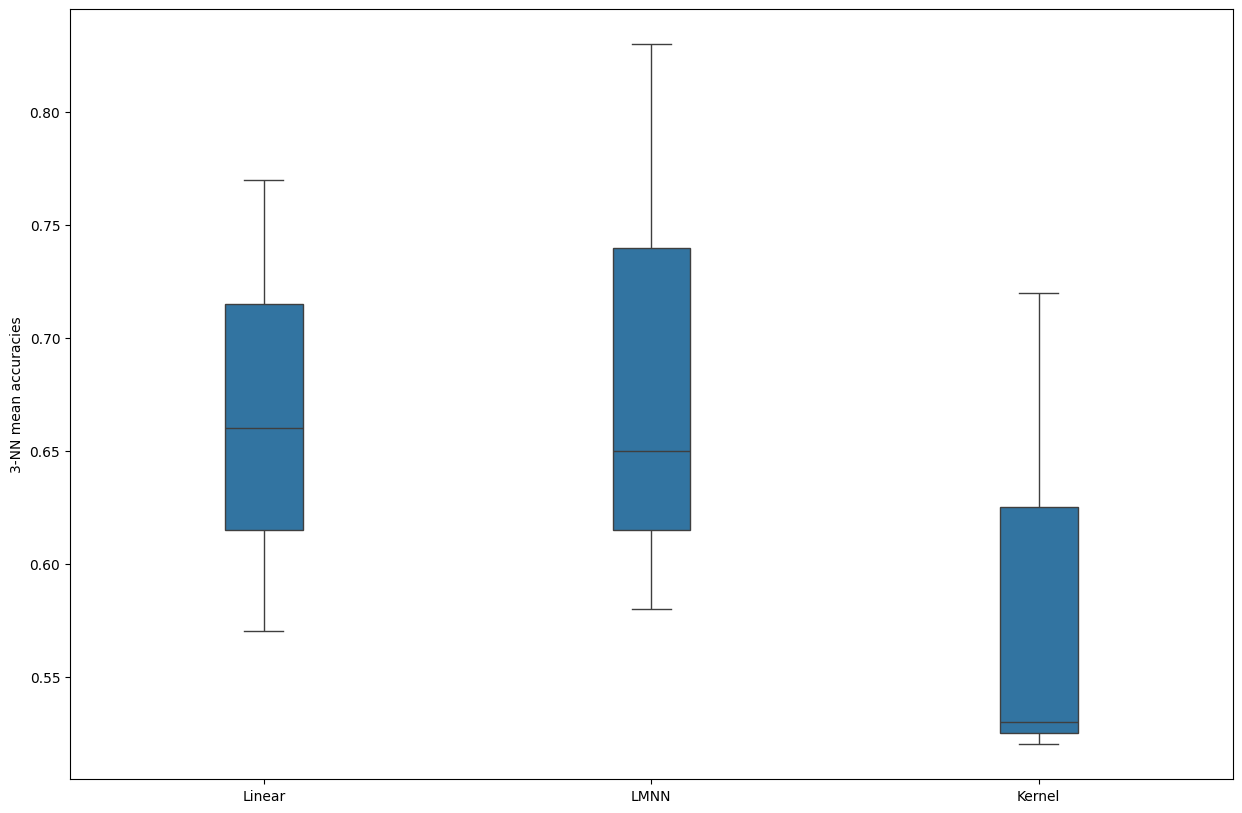

In [28]:
datasets = list(results.keys())
methods = list(results[datasets[0]].keys())
method_arguments = list(results[datasets[0]][methods[0]])


total_accuracies = []
for method in methods:
    
    kNN_accuracies_method = []
    for dataset in datasets:
        kNN_accuracies_k3 = np.array(results[dataset][method]['K-NN mean accuracies'])[2]
        kNN_accuracies_method.append(kNN_accuracies_k3)
    
    total_accuracies.append(kNN_accuracies_method)

method_values = []
for method, accuracies in zip(methods, total_accuracies):
    for accuracy in accuracies:
        method_values.append([method, accuracy])

df = pd.DataFrame(method_values, columns=['Method', 'Accuracy'])

medians = df.groupby('Method')['Accuracy'].median().sort_values(ascending=False)
variances = df.groupby('Method')['Accuracy'].var()
sorted_methods = medians.index.tolist()
std_devs = df.groupby('Method')['Accuracy'].std()

plt.figure(figsize=(15, 10))
sns.boxplot(x='Method', y='Accuracy', data=df, order=sorted_methods, width=0.2)
plt.ylabel("3-NN mean accuracies")
plt.xlabel("")
plt.show()

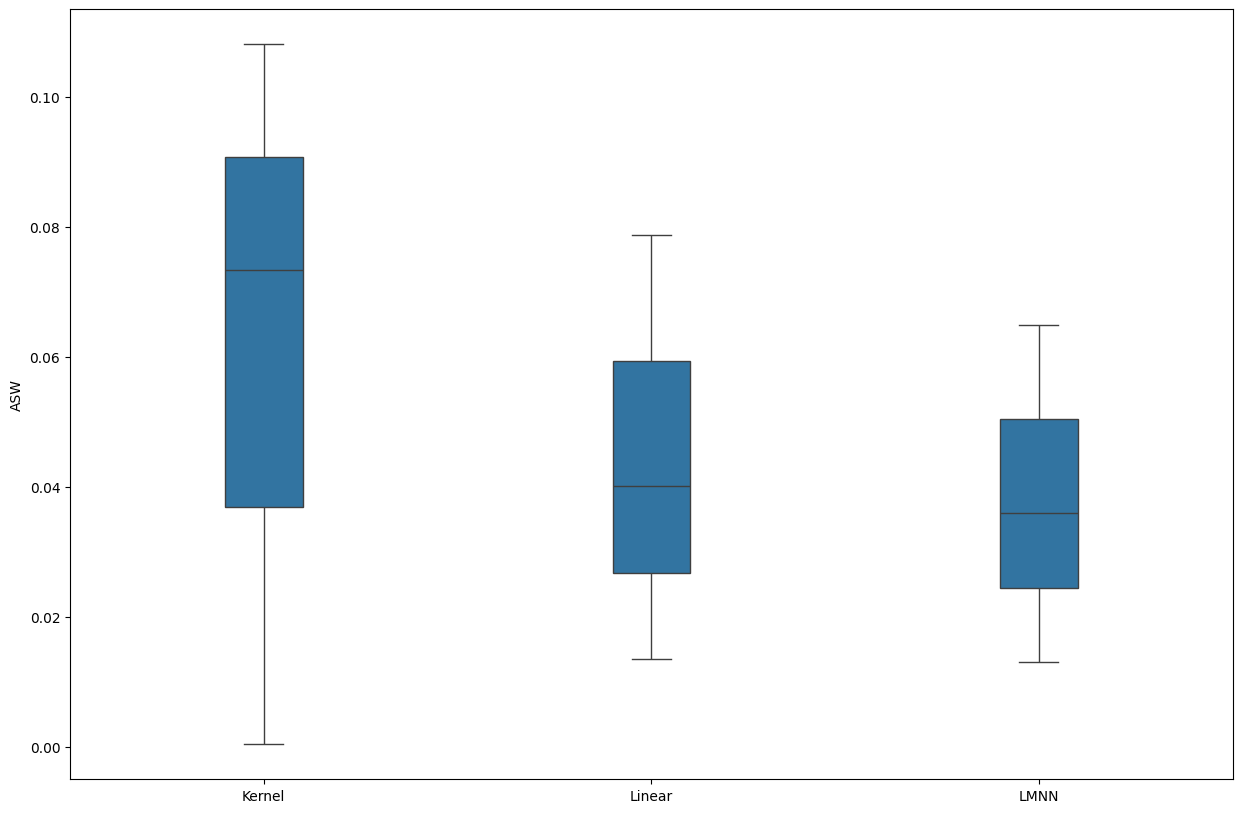

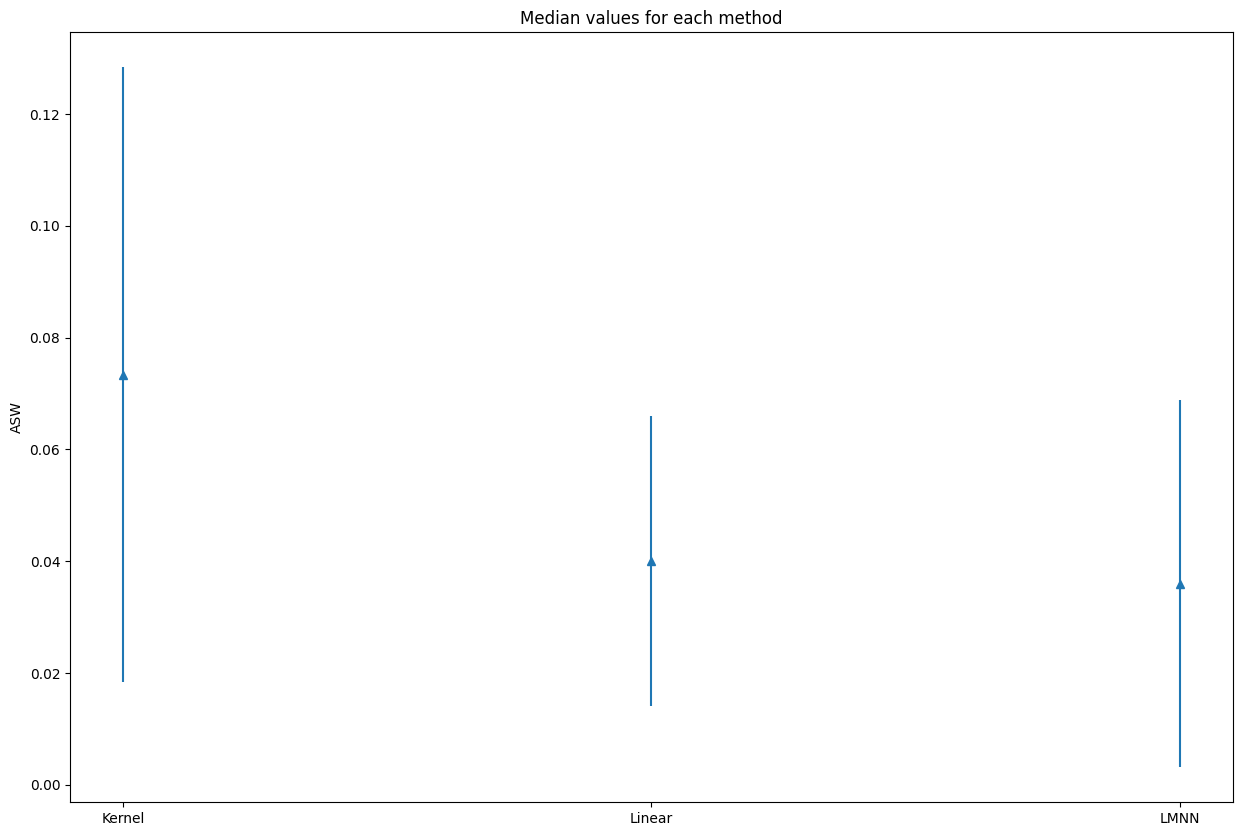

In [27]:
datasets = list(results.keys())
methods = list(results[datasets[0]].keys())

total_scores = []
for method in methods:
    method_scores = []
    for dataset in datasets:
        method_scores += results[dataset][method]['ASW_scores']
    
    total_scores.append(method_scores)
    
method_values = []
for method, score_list in zip(methods, total_scores):
    for val in score_list:
        method_values.append([method, val])

df = pd.DataFrame(method_values, columns=['Method', 'Value'])

medians = df.groupby('Method')['Value'].median().sort_values(ascending=False)
sorted_methods = medians.index.tolist()
variances = df.groupby('Method')['Value'].var()
std_devs = df.groupby('Method')['Value'].std()

plt.figure(figsize=(15, 10))
sns.boxplot(x='Method', y='Value', data=df, order=sorted_methods, width=0.2)
plt.ylabel("ASW")
plt.xlabel("")
plt.show()

plt.figure(figsize=(15, 10))
#sns.barplot(x='Method', y='Value', data=df, errorbar='sd', order=sorted_methods)
plt.errorbar(medians.index, medians.values, yerr=std_devs.values, linestyle='None', marker='^')
plt.title("Median values for each method")
plt.ylabel("ASW")
plt.show()

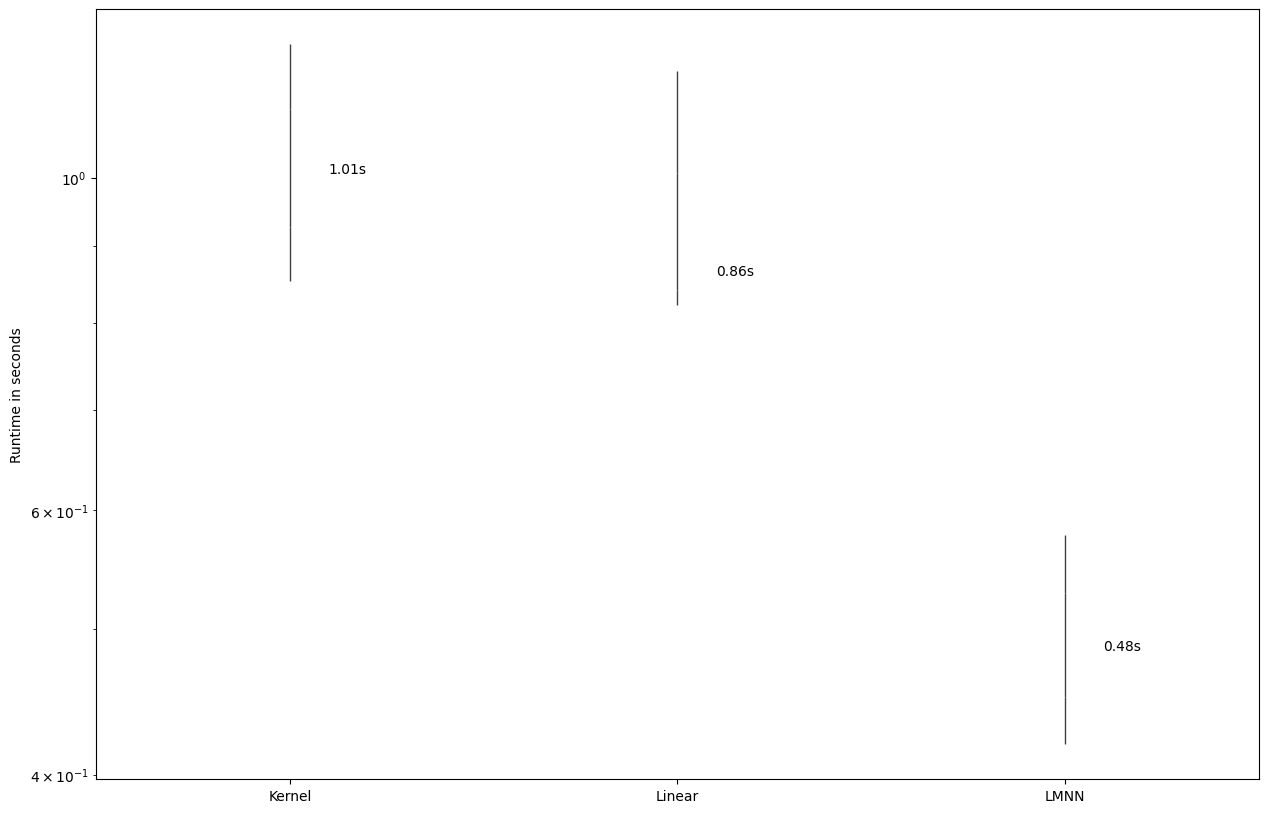

In [30]:
datasets = list(results.keys())
methods = list(results[datasets[0]].keys())

times = []
for method in methods:
    
    if method == 'Euclidean':
        continue
    method_times = []
    for dataset in datasets:
        method_times.append(results[dataset][method]['time'])
        
    times.append(method_times)
    
    
method_values = []
for method, score_list in zip(methods, times):
    for val in score_list:
        method_values.append([method, val])

df = pd.DataFrame(method_values, columns=['Method', 'Time'])
means = df.groupby('Method')['Time'].median().sort_values(ascending=False)
variances = df.groupby('Method')['Time'].var()
sorted_methods = means.index.tolist()
std_devs = df.groupby('Method')['Time'].std()
    
plt.figure(figsize=(15, 10))

for i, method in enumerate(means.index):
    mean_val = means[method]
    plt.text(i + 0.1, mean_val, f'{mean_val:.2f}s', horizontalalignment='left', color='black')


sns.boxplot(x='Method', y='Time', data=df, order=sorted_methods, width=0, log_scale=True)
#sns.stripplot(x='Method', y='Time', data=df, color='black', size=5, jitter=True)
#plt.errorbar(medians.index, medians.values, yerr=std_devs.values, linestyle='None', marker='^')
plt.ylabel("Runtime in seconds")
plt.xlabel("")
plt.show()